In [1]:
# %matplotlib notebook
import pandas
import matplotlib.pyplot as plt
from datetime import datetime
from sys import argv
import numpy as np
from functools import reduce

In [2]:
def graph_coverages(results_path):
    name = results_path + 'Coverages Overlayed'
    contents = pandas.read_csv(results_path + "metrics.csv")

    pairs = [pair.replace("(", "").replace(")", "").split(',') for pair in contents['percent_coverage']]
    pairs = [(float(pair[0]), float(pair[1])) for pair in pairs]
    primary = [pair[0] for pair in pairs]
    secondary = [pair[1] for pair in pairs]

    datetimes = [datetime.strptime(d, "%Y-%m-%d %H:%M:%S.%f") for d in contents['timestamp']]
    primaries = [(datetimes[i], primary[i]) for i in range(len(datetimes))]
    secondaries = [(datetimes[i], secondary[i]) for i in range(len(datetimes))]

    primaries.sort()
    secondaries.sort()



#     plt.figure(results_path + "Primary Coverage")
#     plt.ylim(-5, 80)
#     plt.plot([pair[0] for pair in primaries], [pair[1] for pair in primaries], 'b-')
#     plt.plot([pair[0] for pair in primaries], [pair[1] for pair in primaries], 'bo')




#     plt.figure(results_path + 'Secondary Coverage')
#     plt.ylim(-5, 80)
#     plt.plot([pair[0] for pair in secondaries], [pair[1] for pair in secondaries], 'r-')
#     plt.plot([pair[0] for pair in secondaries], [pair[1] for pair in secondaries], 'ro')



    print(name)
    plt.figure(name)
#     plt.rcParams['figure.figsize'] = [10, 5]
    plt.ylim(-5, 105)
#     plt.plot([pair[0] for pair in secondaries], [pair[1] for pair in secondaries], 'rx')
#     plt.plot([pair[0] for pair in primaries], [pair[1] for pair in primaries], 'bx')
    plt.plot([pair[0] for pair in secondaries], [pair[1] for pair in secondaries], 'm-')
    plt.plot([pair[0] for pair in primaries], [pair[1] for pair in primaries], 'b-')

    plt.savefig(name + '.pdf')
    plt.show()

In [3]:
def graph_times(results_path):
    name = results_path + "Time from Base to Emergency in Minutes"
    contents = pandas.read_csv(results_path + "processed_cases.csv")

    # times = np.array([[pandas.to_timedelta(td).total_seconds()/60 for td in contents.values[i][7:12]] for i in range(len(contents.values))])

    # Only the to incident
    times = np.array([[pandas.to_timedelta(td).total_seconds()/60 for td in [contents.values[i][7]]] for i in range(len(contents.values))])


    case_durations = [reduce(lambda a, b: a + b, p, 0.0) for p in times]

    print(name)
    plt.figure(name)
#     plt.rcParams['figure.figsize'] = [10, 5]

    plt.ylim(-5, 45)
    plt.plot(case_durations, 'kx')
    plt.plot([0, len(case_durations)], [10, 10], 'r-')
    plt.plot([0, len(case_durations)], [14, 14], 'y-')
    plt.savefig(name + '.pdf')
#     plt.rcParams['figure.figsize'] = [10, 5]
#     plt.bar()
    plt.show()

In [4]:
def graph_delay(results_path):
    name_minutes = results_path + 'Total Case Delay in Minutes'
    name_cases = results_path + 'Total number of cases being delayed'
    
    contents = pandas.read_csv(results_path + "metrics.csv")
    
    metrics = []
    for values in contents.values:
        metrics.append((
            datetime.strptime(values[0], "%Y-%m-%d %H:%M:%S.%f"),
            pandas.to_timedelta(values[2]).total_seconds()/60,
            values[3]
        ))

        
    metrics.sort()
    
    
    print(name_minutes)
    plt.figure(name_minutes)
#     plt.rcParams['figure.figsize'] = [10, 5]
    plt.plot(
        [p[0] for p in metrics],
        [p[1] for p in metrics],
        'r-'
    )
    plt.savefig(name_minutes + '.pdf')
    plt.show() # Comment out if using matplotlib notebooks.
    
    print(name_cases)
    plt.figure(name_cases)
#     plt.rcParams['figure.figsize'] = [10, 5]
    plt.plot(
        [p[0] for p in metrics],
        [p[2] for p in metrics],
        'r-'
    )
    plt.savefig(name_cases + '.pdf')
    plt.show()
    

In [5]:
def graph(results_path):
    print('*' * 80)
    plt.rcParams['figure.figsize'] = [15, 10]
    graph_times(results_path)
    graph_coverages(results_path)
    graph_delay(results_path)
    print('*' * 80)
    print('\n'*10)


********************************************************************************
../results/dibene-barely-freq-best-travel-times/Time from Base to Emergency in Minutes


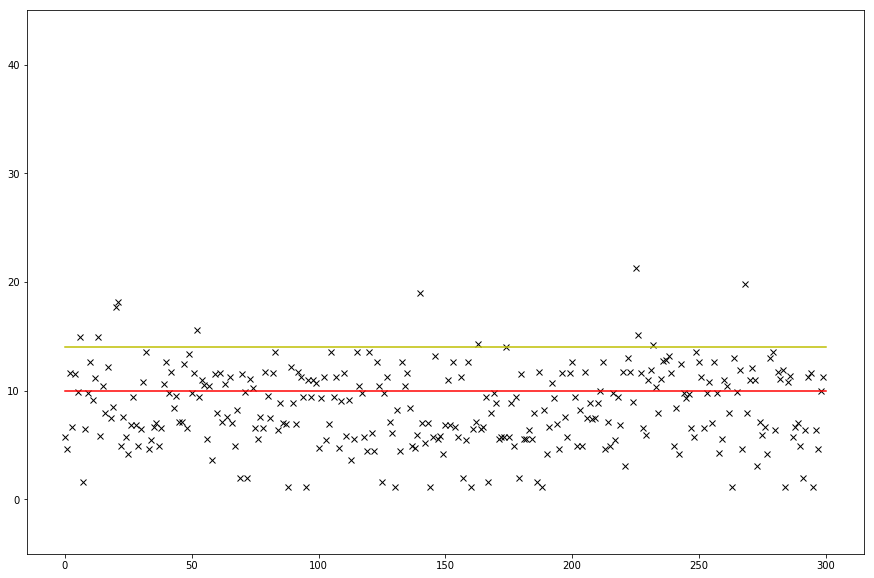

../results/dibene-barely-freq-best-travel-times/Coverages Overlayed


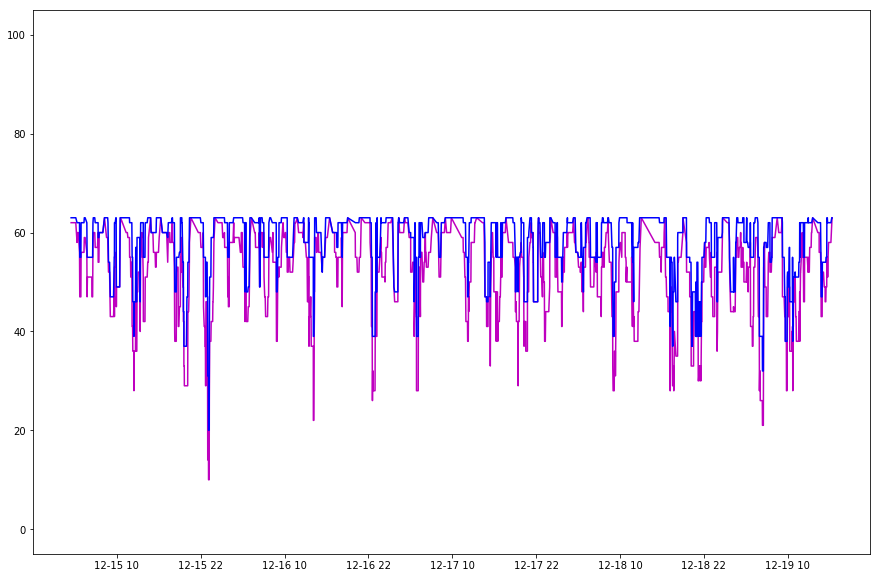

../results/dibene-barely-freq-best-travel-times/Total Case Delay in Minutes


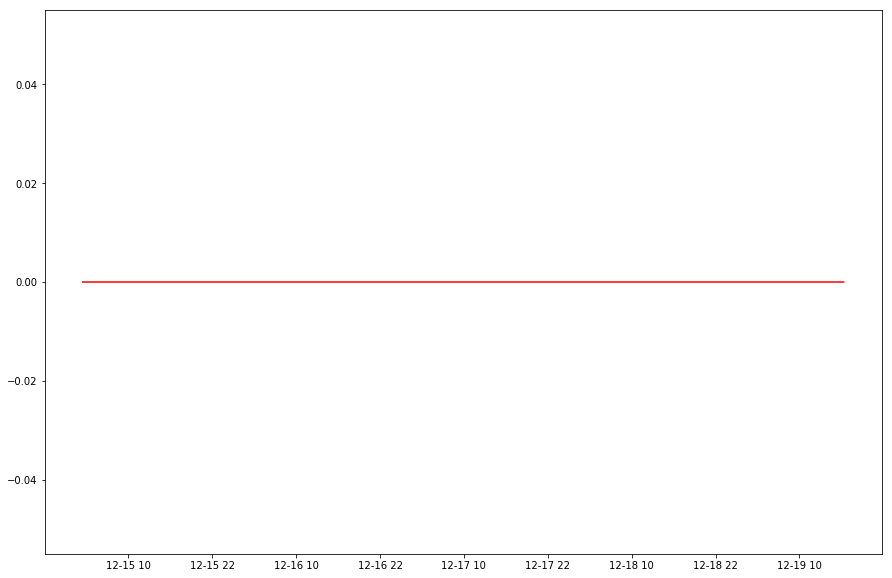

../results/dibene-barely-freq-best-travel-times/Total number of cases being delayed


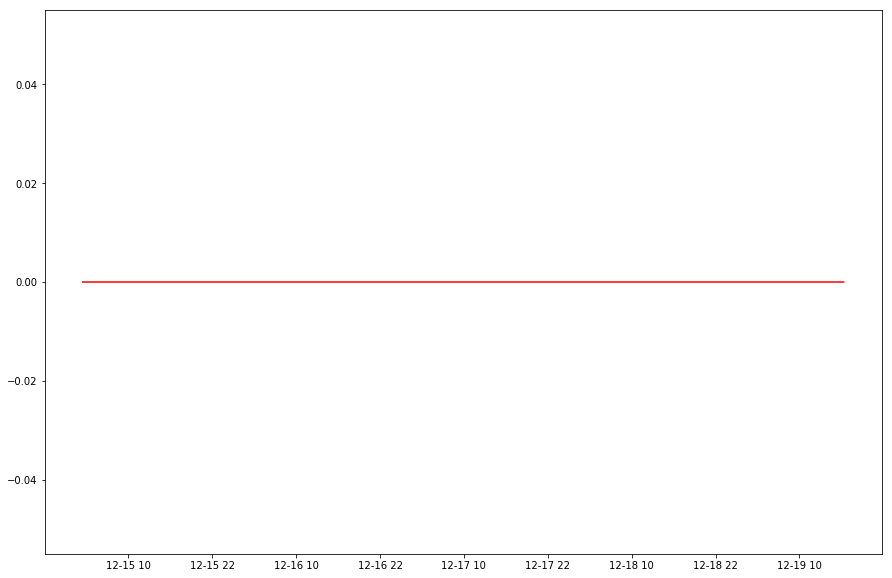

********************************************************************************











********************************************************************************
../results/dibene-barely-freq-least-disruption/Time from Base to Emergency in Minutes


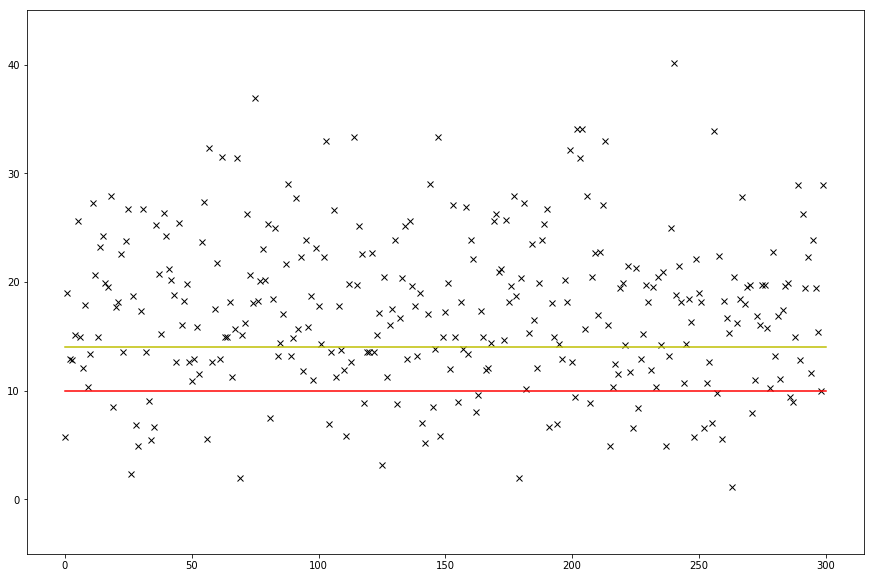

../results/dibene-barely-freq-least-disruption/Coverages Overlayed


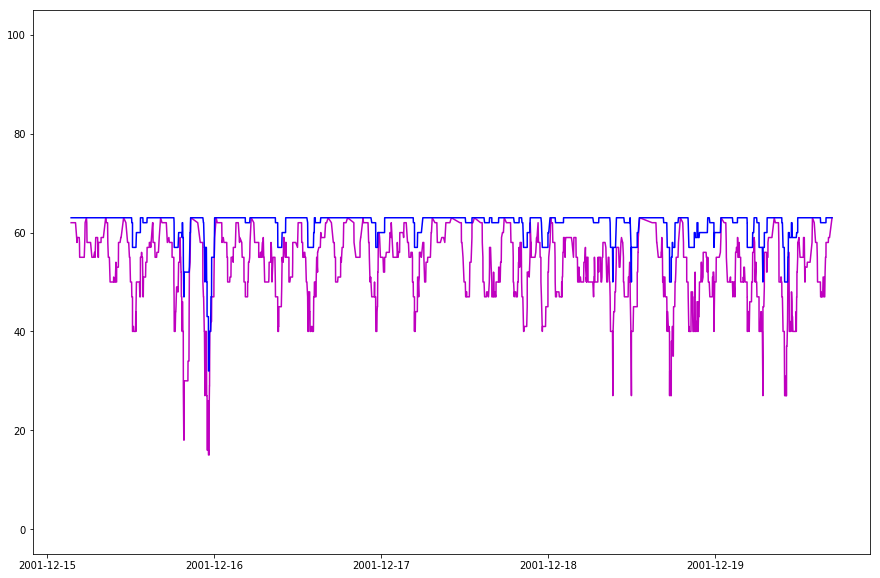

../results/dibene-barely-freq-least-disruption/Total Case Delay in Minutes


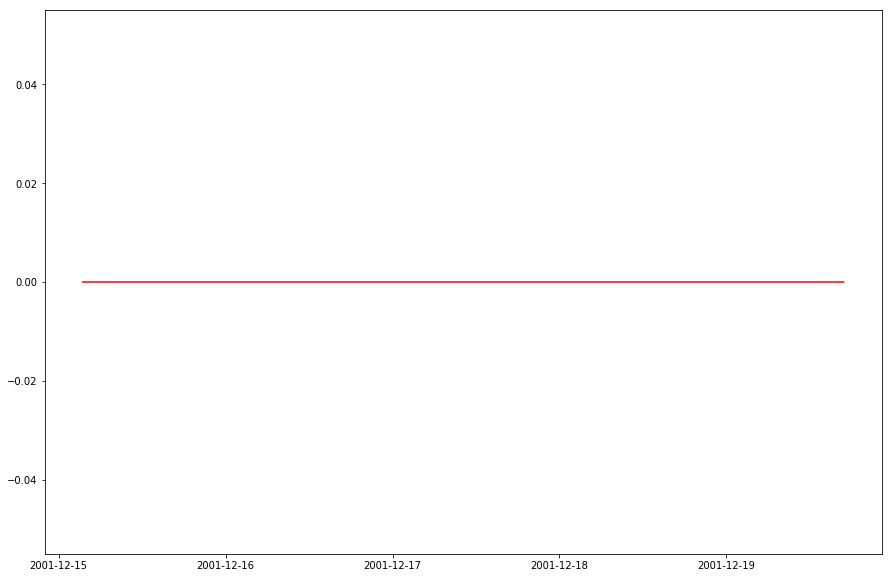

../results/dibene-barely-freq-least-disruption/Total number of cases being delayed


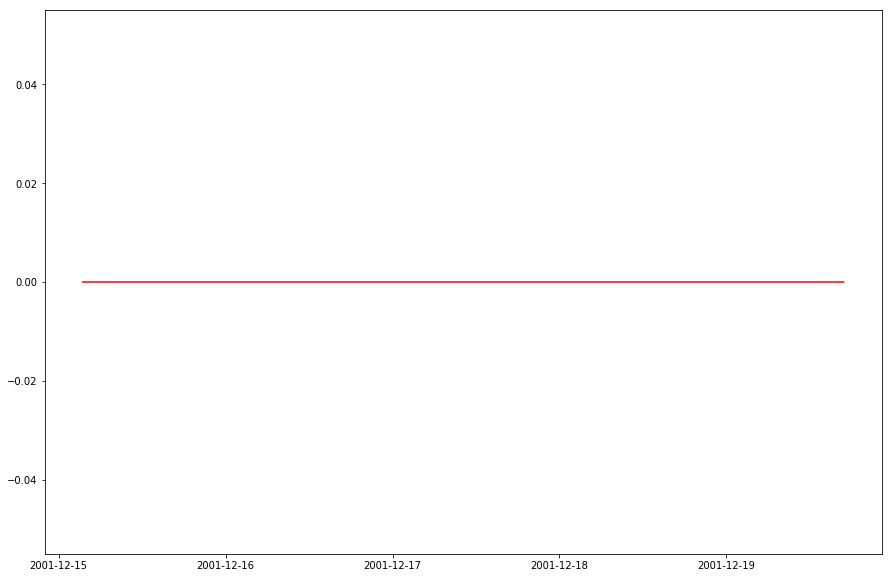

********************************************************************************













In [6]:
results_path = ["../results/{}/".format(name) for name in (
        "dibene-barely-freq-best-travel-times",  
        "dibene-barely-freq-least-disruption",  
    )]
for path in results_path:
    graph(path)


********************************************************************************
../results/dibene-low-freq-best-travel-times/Time from Base to Emergency in Minutes


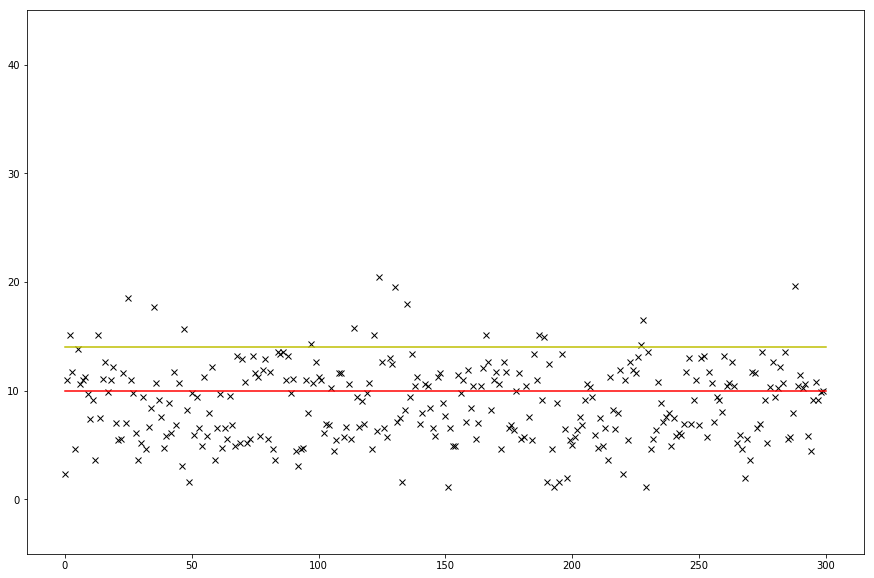

../results/dibene-low-freq-best-travel-times/Coverages Overlayed


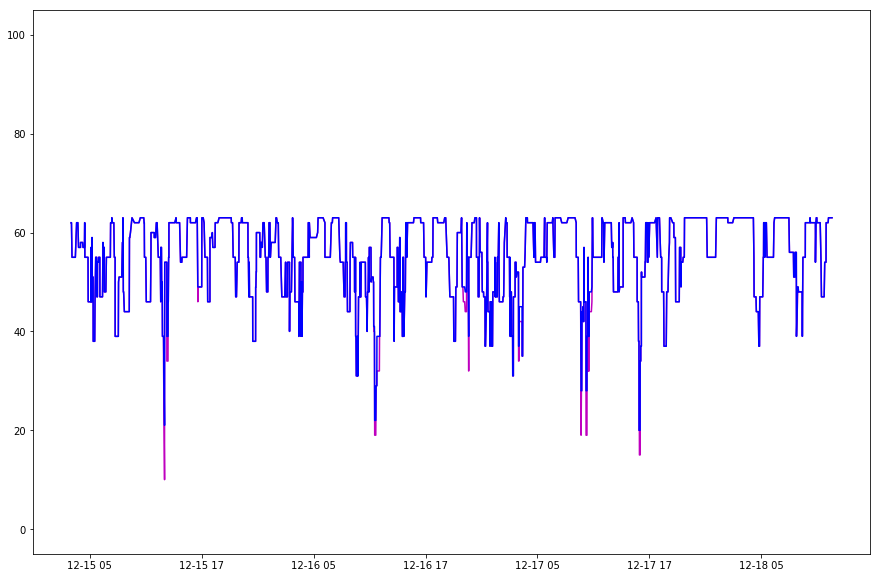

../results/dibene-low-freq-best-travel-times/Total Case Delay in Minutes


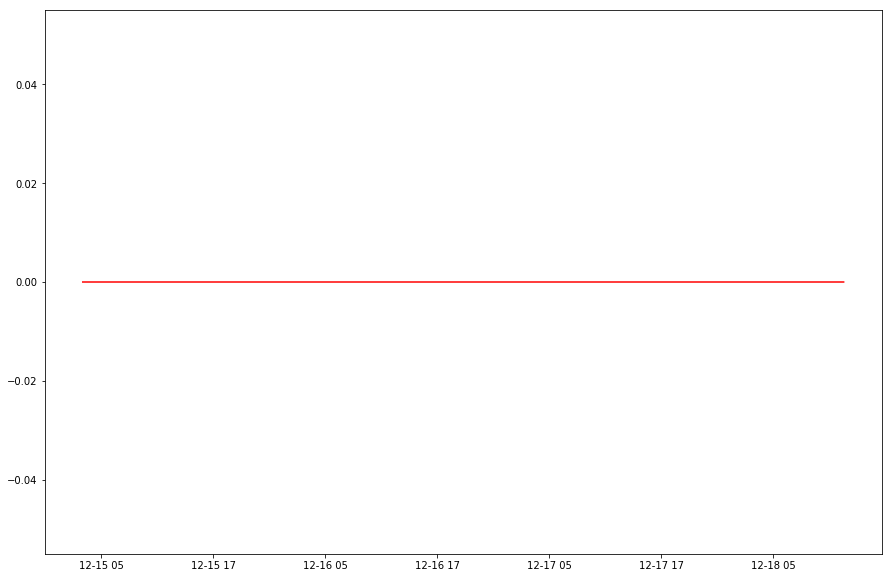

../results/dibene-low-freq-best-travel-times/Total number of cases being delayed


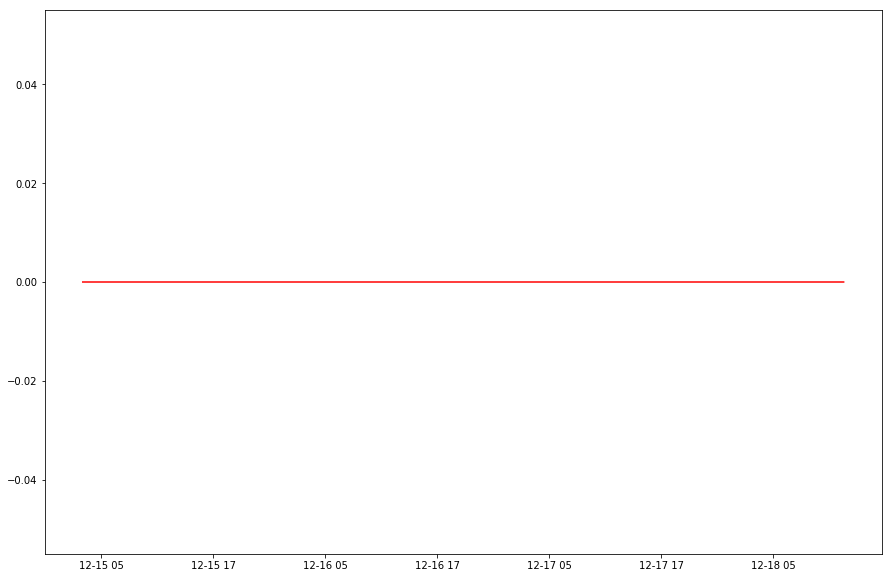

********************************************************************************











********************************************************************************
../results/dibene-low-freq-least-disruption/Time from Base to Emergency in Minutes


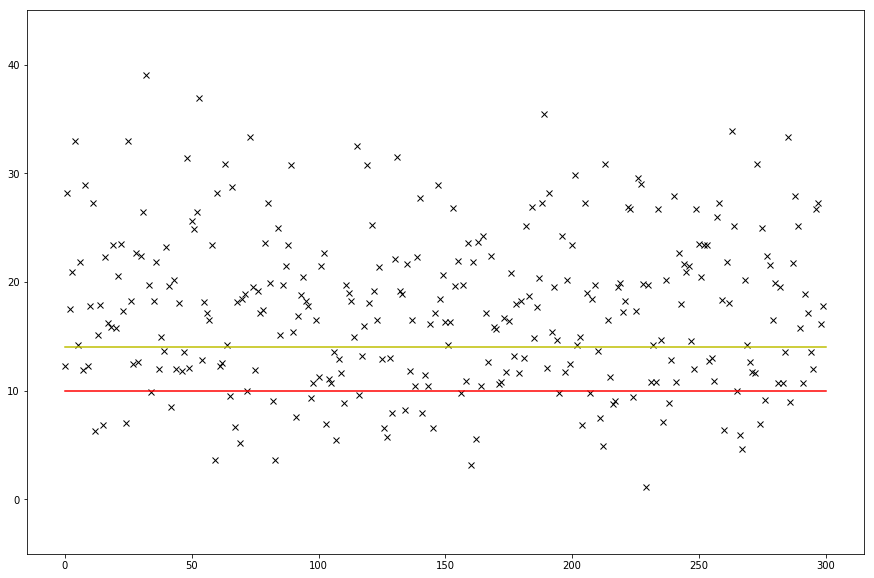

../results/dibene-low-freq-least-disruption/Coverages Overlayed


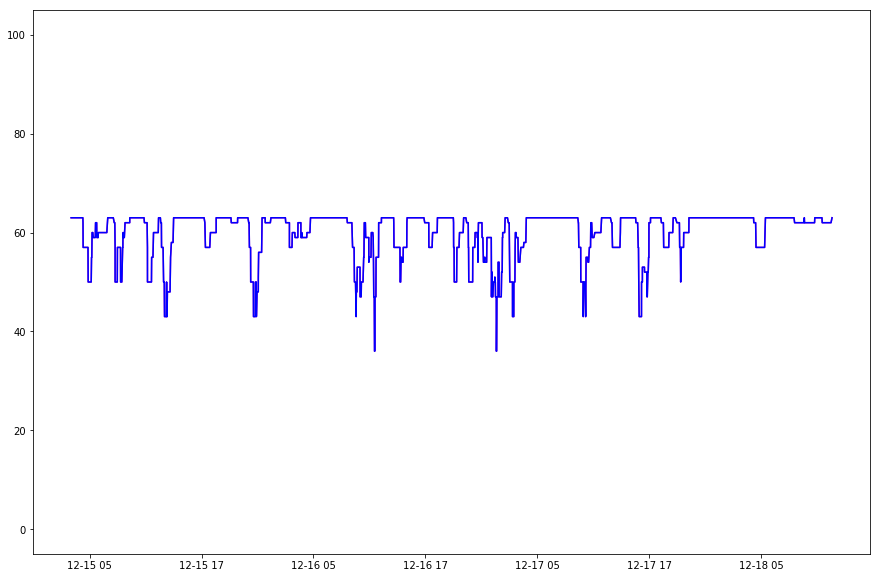

../results/dibene-low-freq-least-disruption/Total Case Delay in Minutes


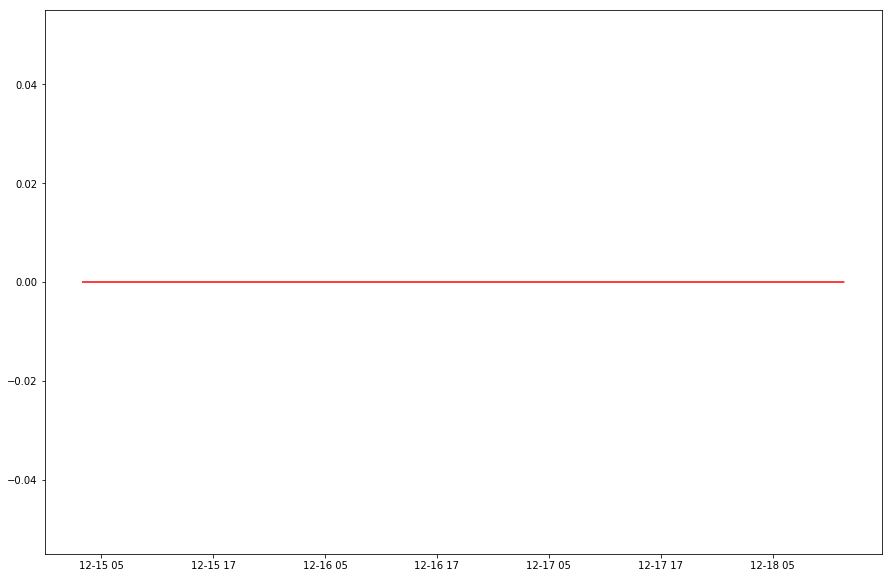

../results/dibene-low-freq-least-disruption/Total number of cases being delayed


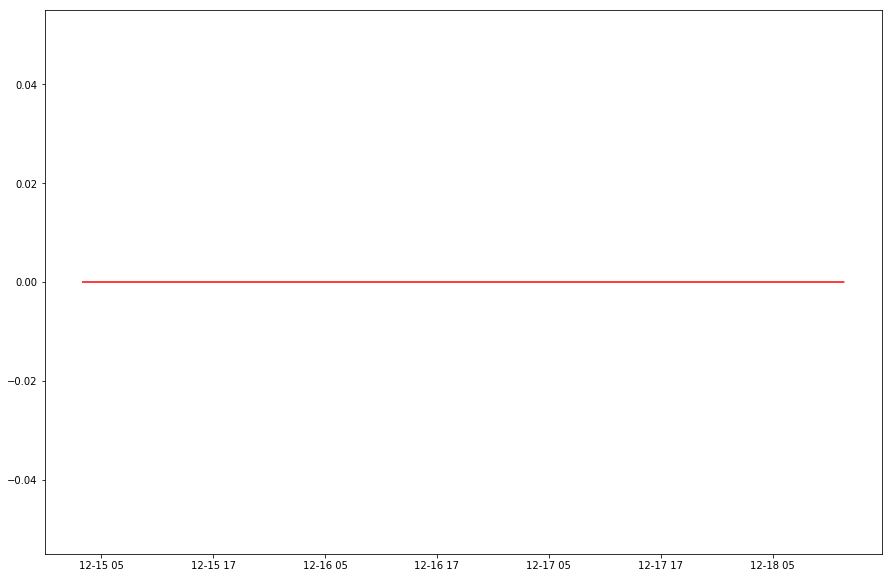

********************************************************************************













In [7]:
results_path = ["../results/{}/".format(name) for name in (
        "dibene-low-freq-best-travel-times",  
        "dibene-low-freq-least-disruption",  
    )]
for path in results_path:
    graph(path)


********************************************************************************
../results/dibene-med-freq-best-travel-times/Time from Base to Emergency in Minutes


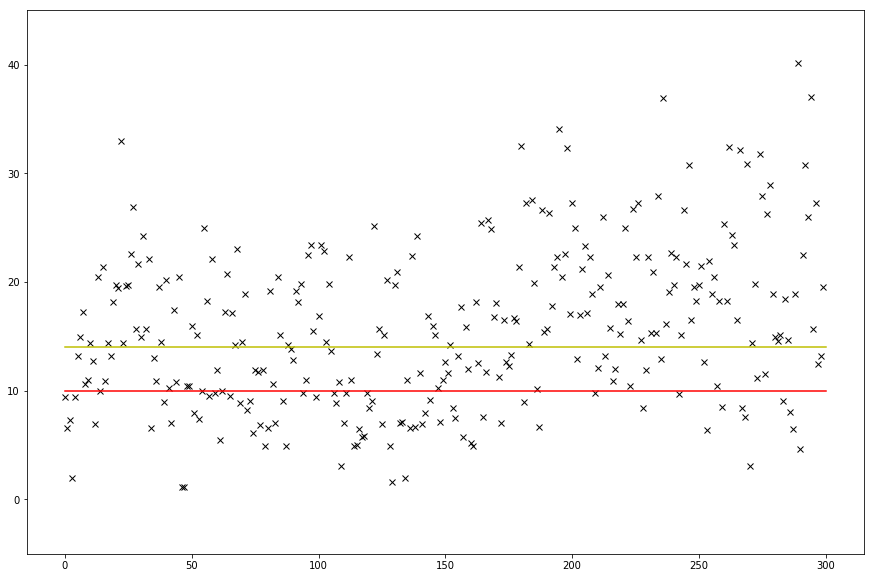

../results/dibene-med-freq-best-travel-times/Coverages Overlayed


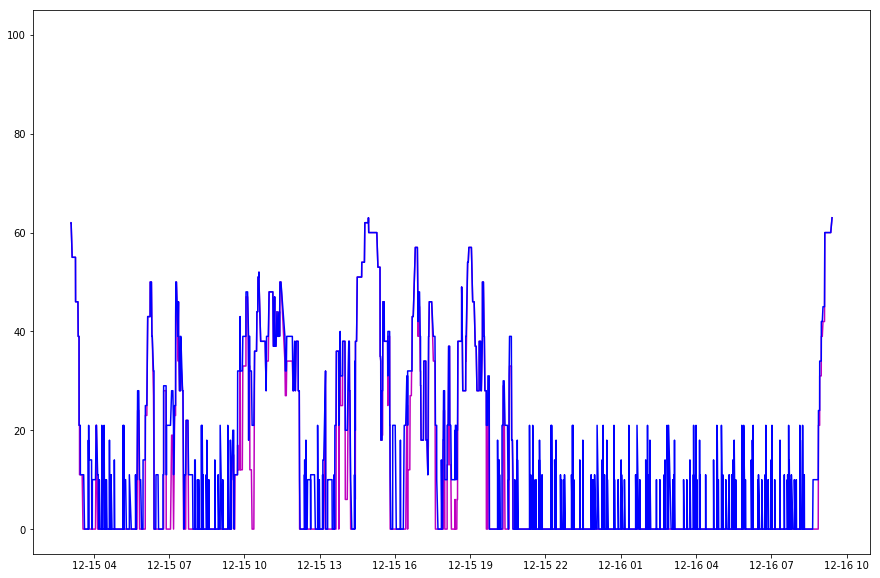

../results/dibene-med-freq-best-travel-times/Total Case Delay in Minutes


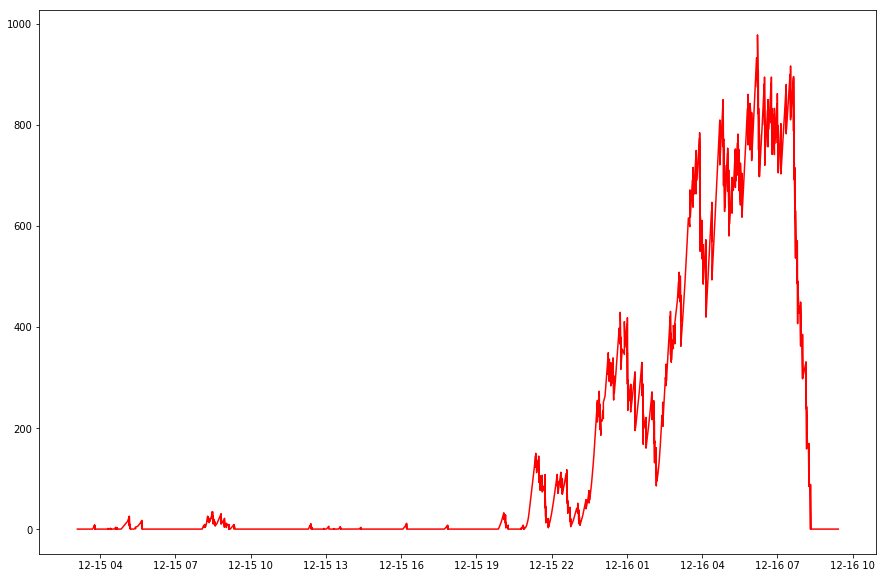

../results/dibene-med-freq-best-travel-times/Total number of cases being delayed


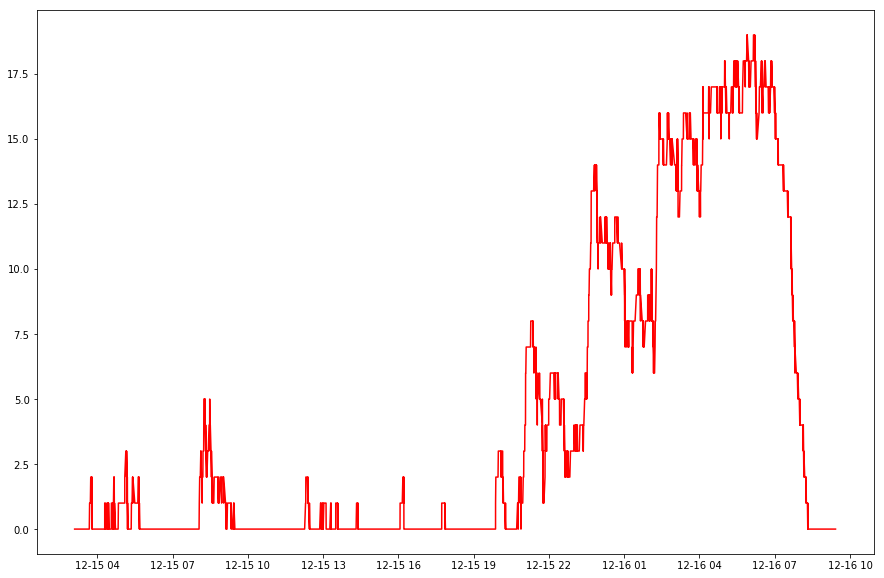

********************************************************************************











********************************************************************************
../results/dibene-med-freq-least-disruption/Time from Base to Emergency in Minutes


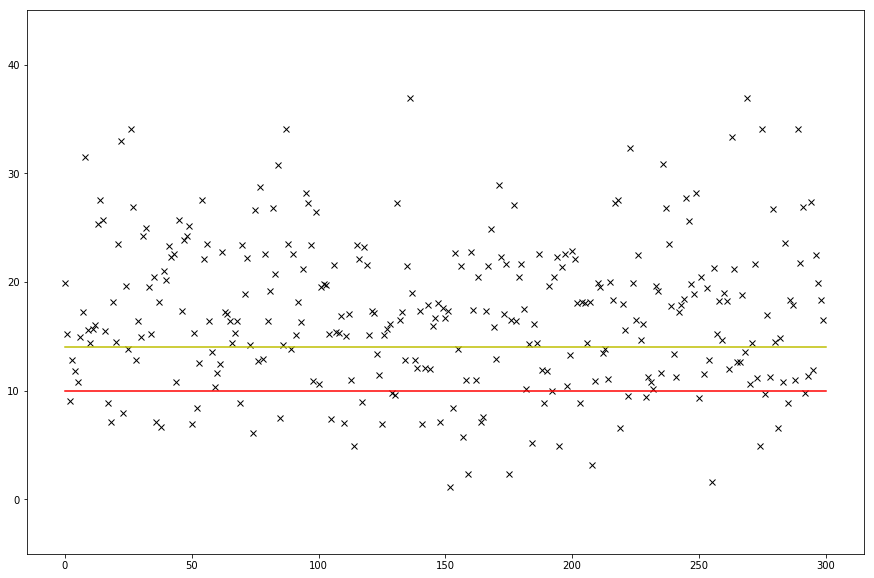

../results/dibene-med-freq-least-disruption/Coverages Overlayed


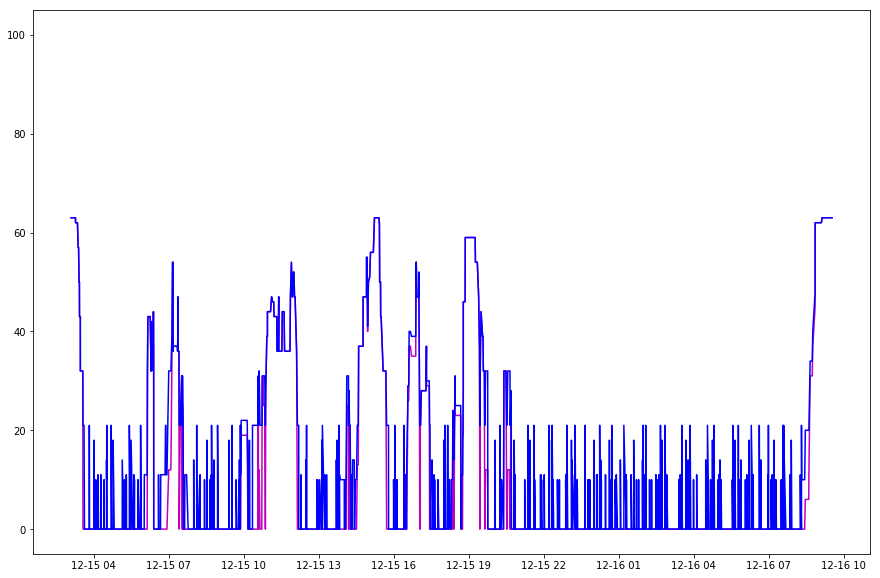

../results/dibene-med-freq-least-disruption/Total Case Delay in Minutes


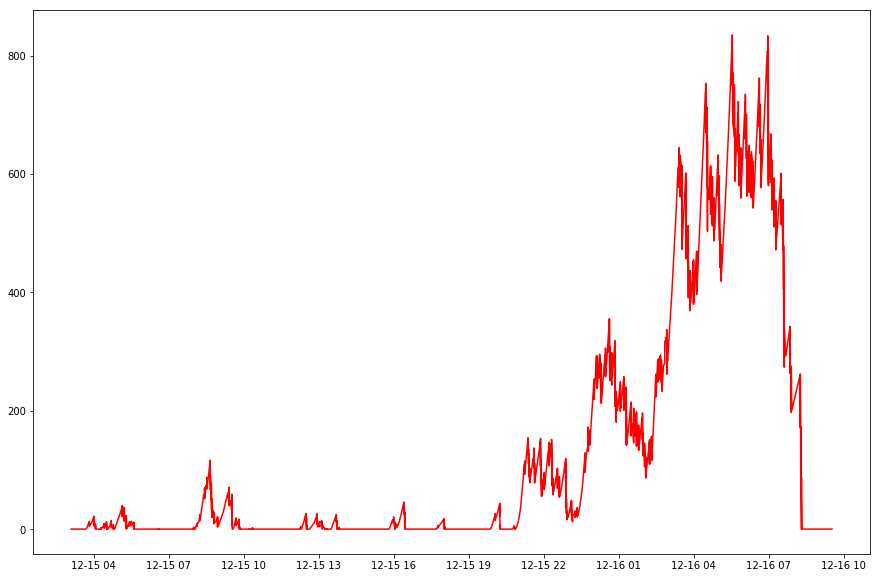

../results/dibene-med-freq-least-disruption/Total number of cases being delayed


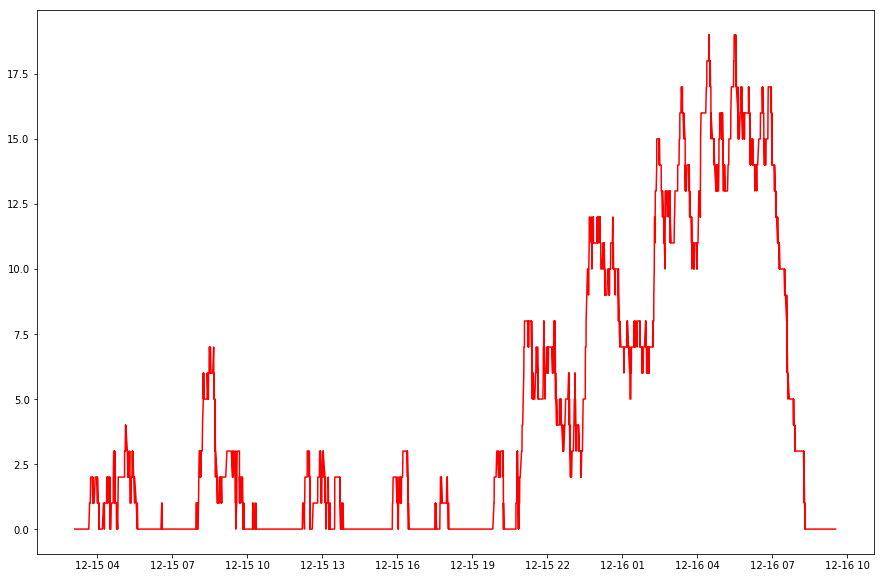

********************************************************************************













In [8]:
results_path = ["../results/{}/".format(name) for name in (

        "dibene-med-freq-best-travel-times",  
        "dibene-med-freq-least-disruption",

    )]
for path in results_path:
    graph(path)

********************************************************************************
../results/dibene-very-freq-best-travel-times/Time from Base to Emergency in Minutes


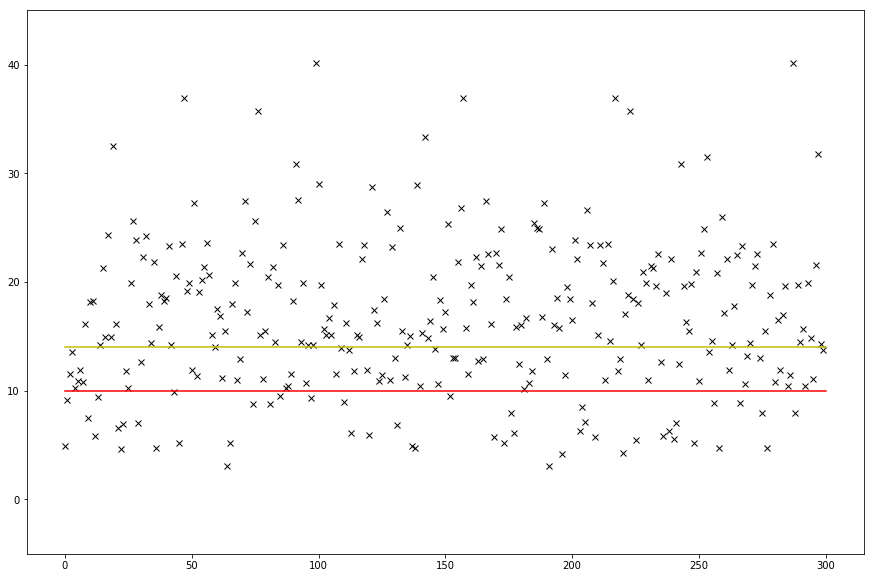

../results/dibene-very-freq-best-travel-times/Coverages Overlayed


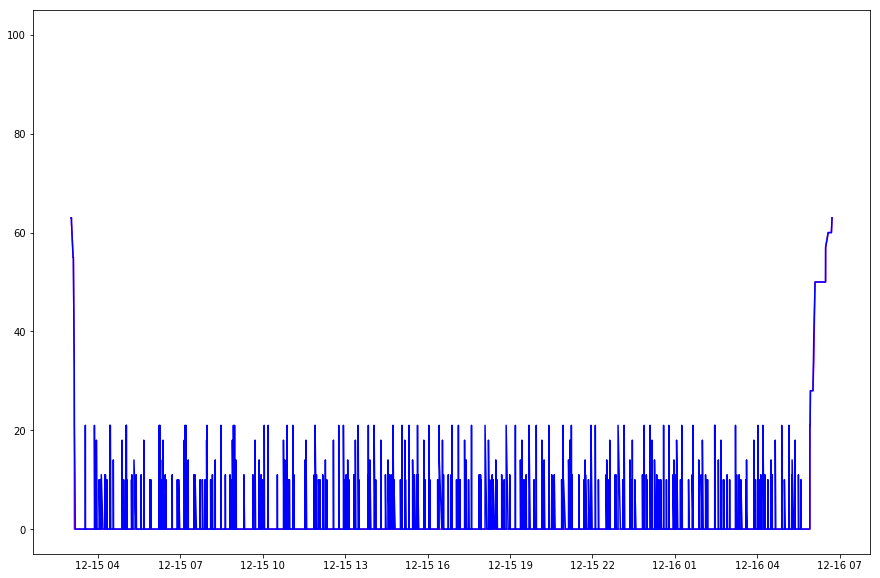

../results/dibene-very-freq-best-travel-times/Total Case Delay in Minutes


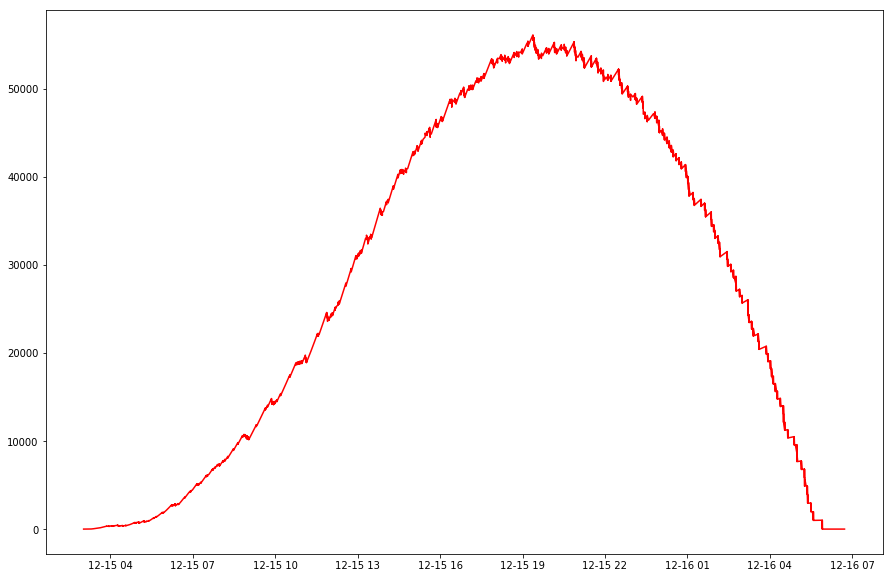

../results/dibene-very-freq-best-travel-times/Total number of cases being delayed


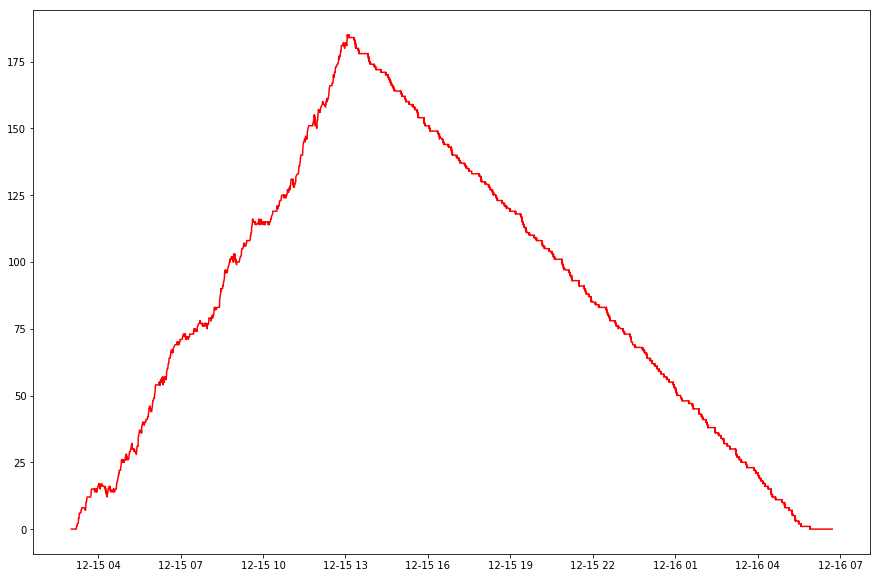

********************************************************************************











********************************************************************************
../results/dibene-very-freq-least-disruption/Time from Base to Emergency in Minutes


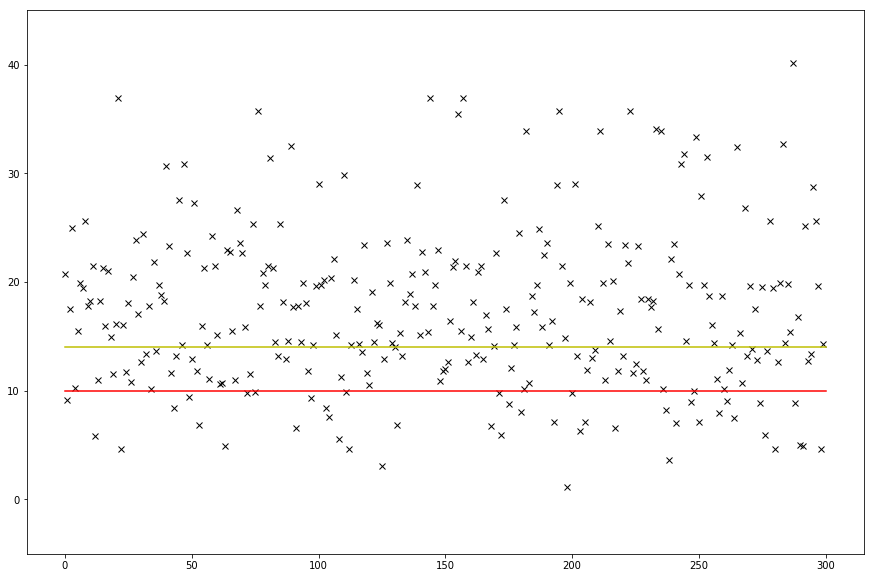

../results/dibene-very-freq-least-disruption/Coverages Overlayed


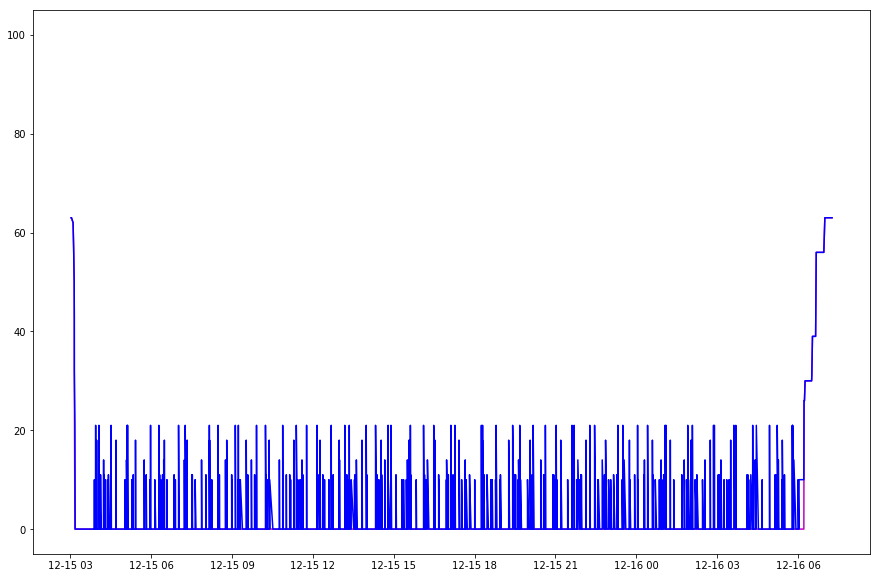

../results/dibene-very-freq-least-disruption/Total Case Delay in Minutes


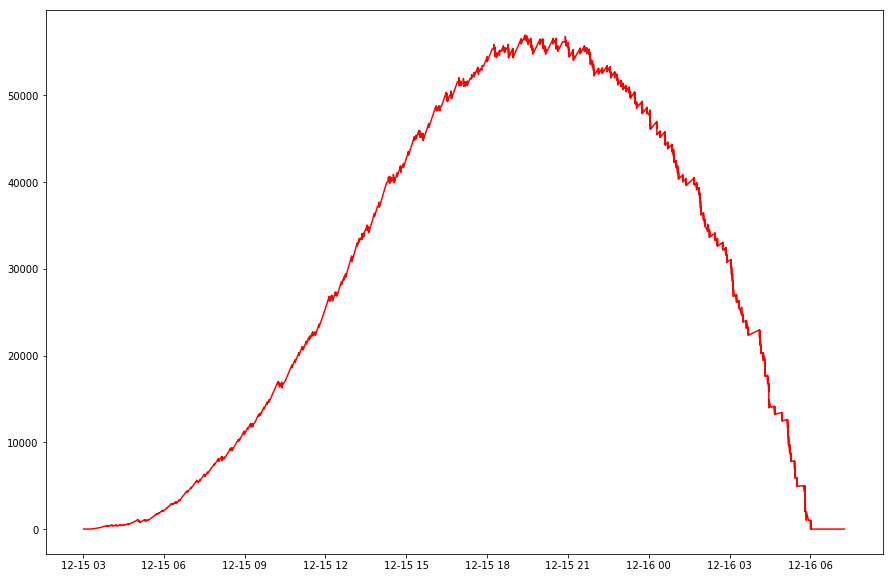

../results/dibene-very-freq-least-disruption/Total number of cases being delayed


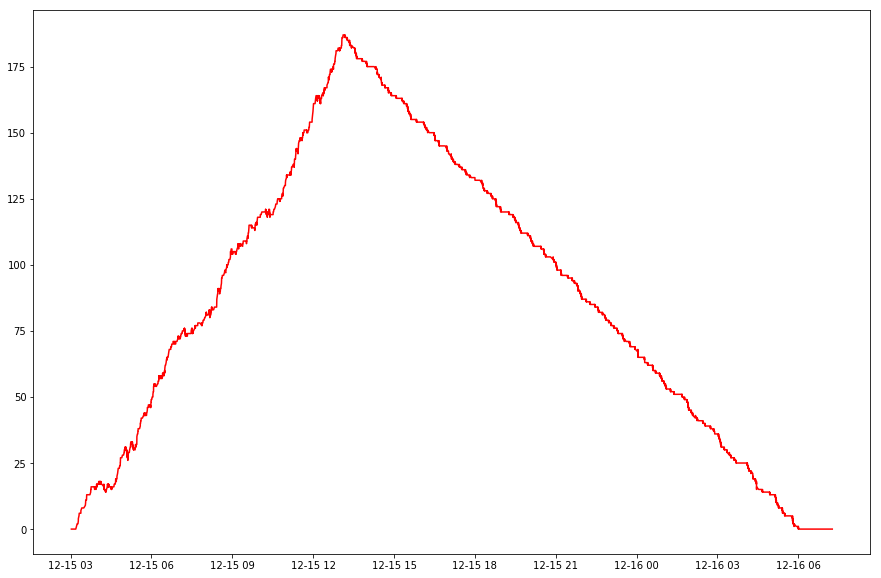

********************************************************************************













In [9]:
results_path = ["../results/{}/".format(name) for name in (

        "dibene-very-freq-best-travel-times",
        "dibene-very-freq-least-disruption"
    )]
for path in results_path:
    graph(path)

********************************************************************************
../results/dibene-xtreme-freq-best-travel-times/Time from Base to Emergency in Minutes


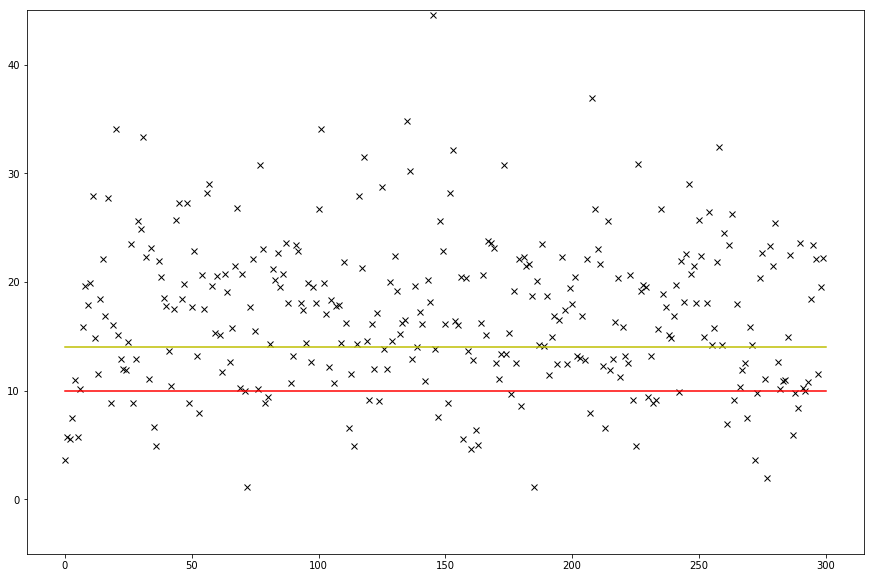

../results/dibene-xtreme-freq-best-travel-times/Coverages Overlayed


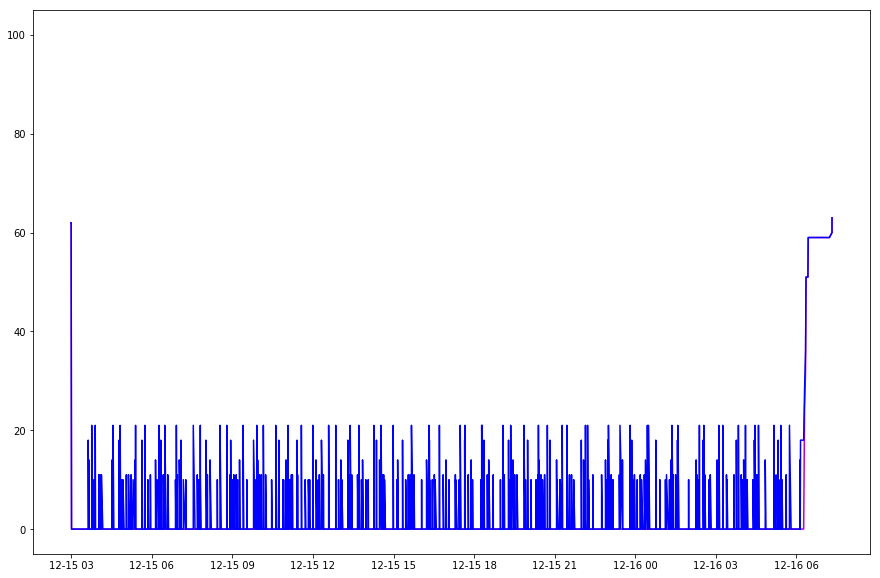

../results/dibene-xtreme-freq-best-travel-times/Total Case Delay in Minutes


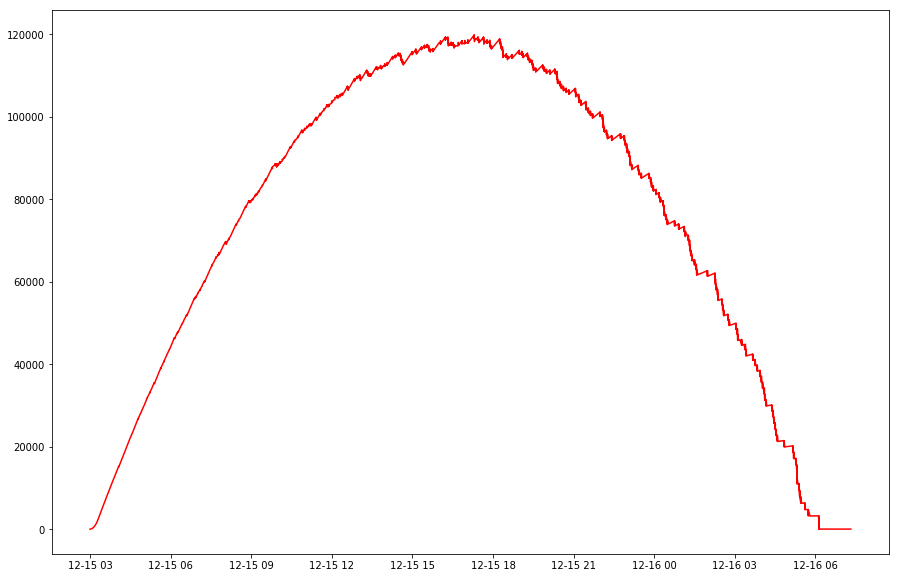

../results/dibene-xtreme-freq-best-travel-times/Total number of cases being delayed


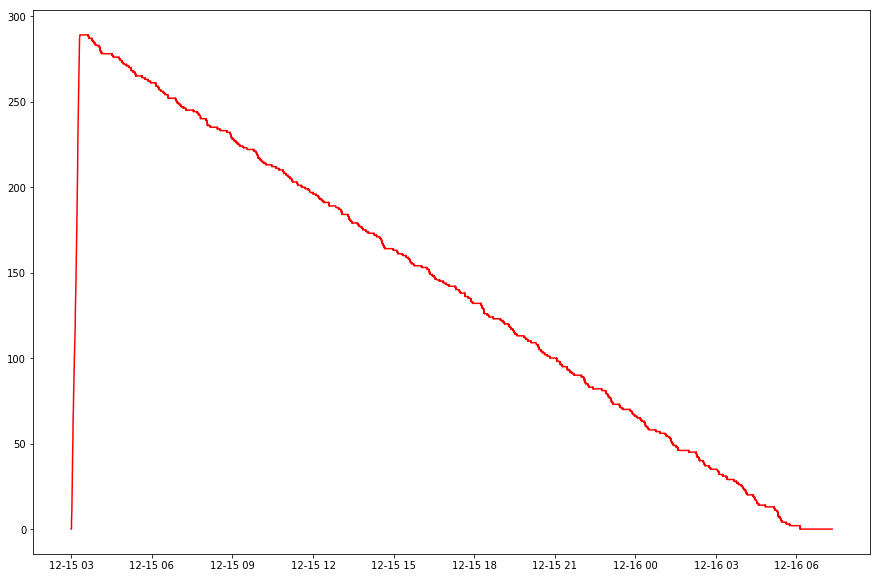

********************************************************************************











********************************************************************************
../results/dibene-xtreme-freq-least-disruption/Time from Base to Emergency in Minutes


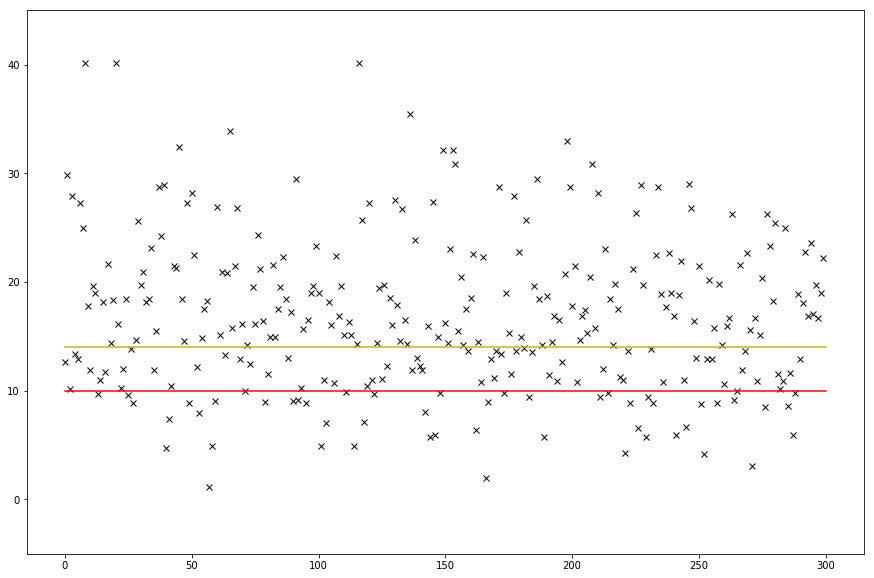

../results/dibene-xtreme-freq-least-disruption/Coverages Overlayed


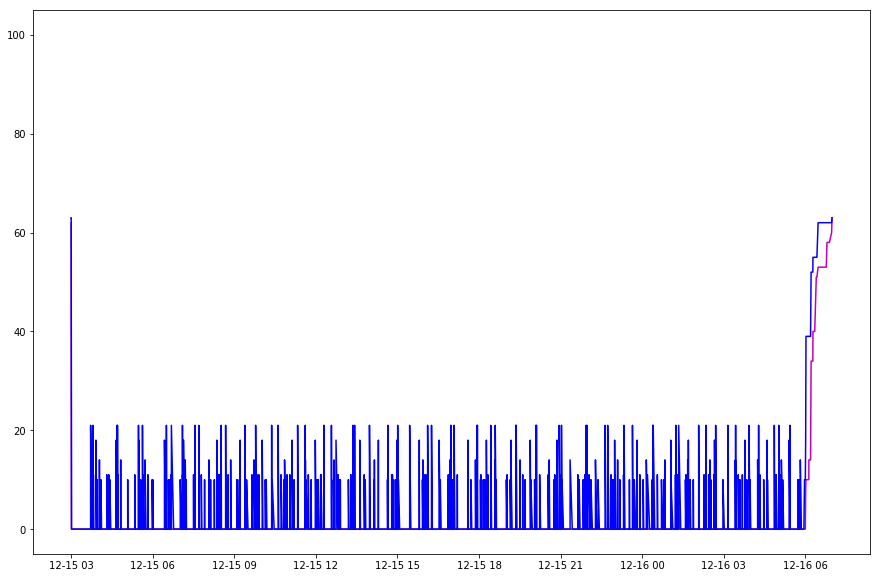

../results/dibene-xtreme-freq-least-disruption/Total Case Delay in Minutes


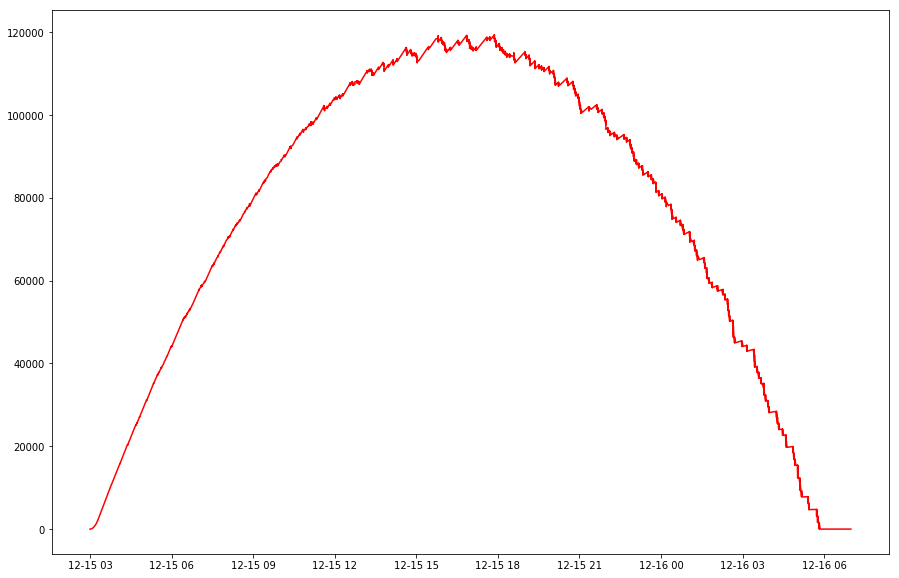

../results/dibene-xtreme-freq-least-disruption/Total number of cases being delayed


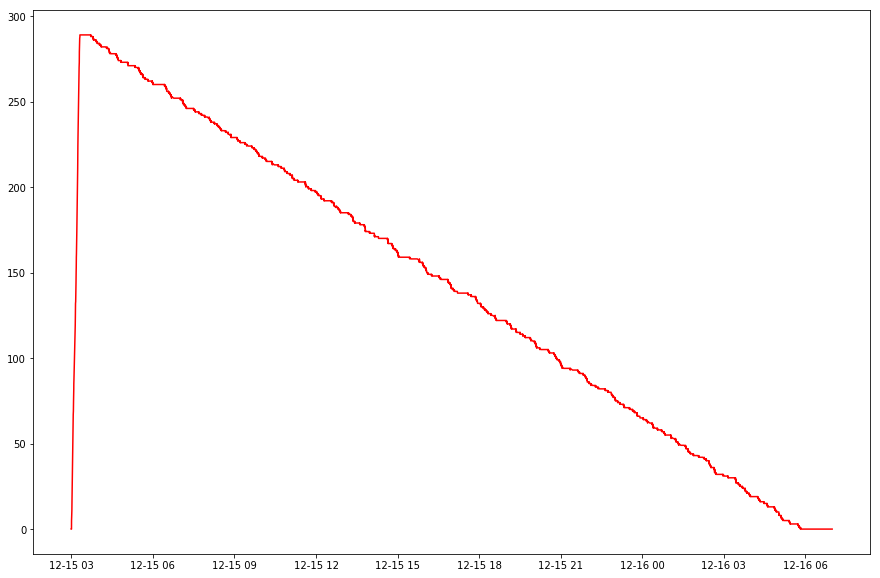

********************************************************************************













In [10]:
results_path = ["../results/{}/".format(name) for name in (

        "dibene-xtreme-freq-best-travel-times",
        "dibene-xtreme-freq-least-disruption"
    )]
for path in results_path:
    graph(path)